In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

In [51]:
train_df = pd.read_csv ('titanic/train.csv')
test_df = pd.read_csv ('titanic/test.csv')

In [52]:
train_df.shape

(891, 12)

In [53]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [54]:
test_df.shape

(418, 11)

In [55]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [56]:
test_df.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [57]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

test data has no "Survived" column

In [58]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [60]:
train_df = train_df.drop(columns=["Cabin"])
test_df = test_df.drop(columns=["Cabin"])

In [61]:
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)

C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_22180\2874709374.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Age"].fillna(train_df["Age"].median(), inplace=True)
C:\Users\lloyduntalan\AppData\Local\Temp\ipykernel_22180\2874709374.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

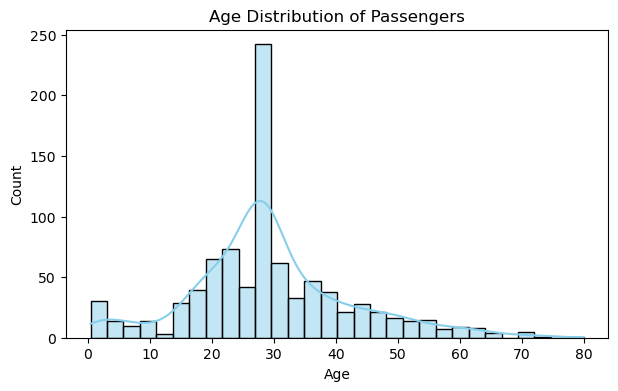

In [62]:
plt.figure(figsize=(7,4))
sns.histplot(train_df["Age"].dropna(), bins=30, kde=True, color="skyblue")
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

In [63]:
train_df["Survival_Label"] = train_df["Survived"].map({0: "Died", 1: "Survived"})

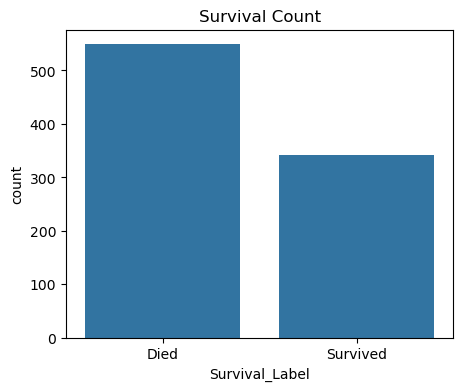

In [64]:
plt.figure(figsize=(5,4))
sns.countplot(x="Survival_Label", data=train_df)
plt.title("Survival Count")
plt.show()

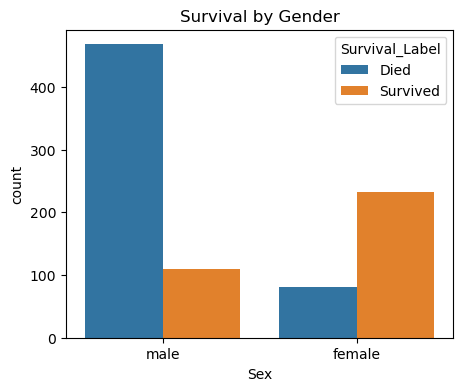

In [65]:
plt.figure(figsize=(5,4))
sns.countplot(x="Sex", hue="Survival_Label", data=train_df)
plt.title("Survival by Gender")
plt.show()

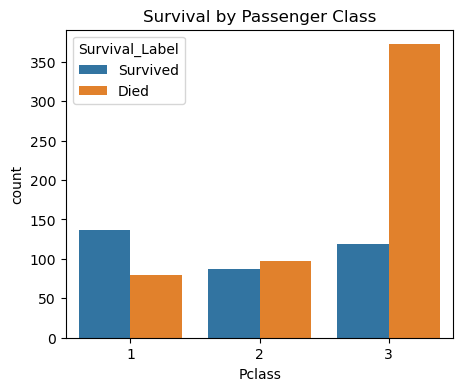

In [66]:
plt.figure(figsize=(5,4))
sns.countplot(x="Pclass", hue="Survival_Label", data=train_df)
plt.title("Survival by Passenger Class")
plt.show()

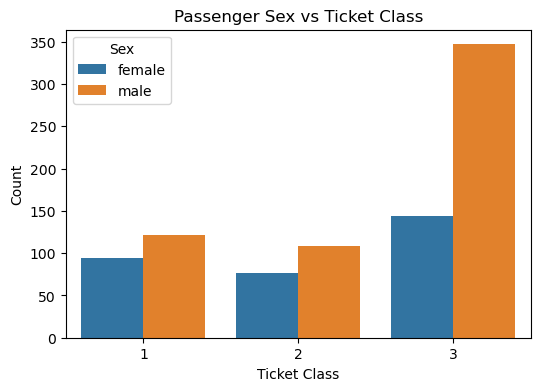

In [67]:

plt.figure(figsize=(6,4))
sns.countplot(data=train_df, x="Pclass", hue="Sex")
plt.title("Passenger Sex vs Ticket Class")
plt.xlabel("Ticket Class")
plt.ylabel("Count")
plt.legend(title="Sex")
plt.show()

In [68]:
embarked_mode = train_df['Embarked'].mode()[0]

train_df['Embarked'] = train_df['Embarked'].fillna(embarked_mode)
test_df['Embarked'] = test_df['Embarked'].fillna(embarked_mode)

Overall average survival probability: 0.38

Average survival probability by Sex:
Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

Average survival probability by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Average survival probability by Sex and Class:
Pclass         1         2         3
Sex                                 
female  0.968085  0.921053  0.500000
male    0.368852  0.157407  0.135447


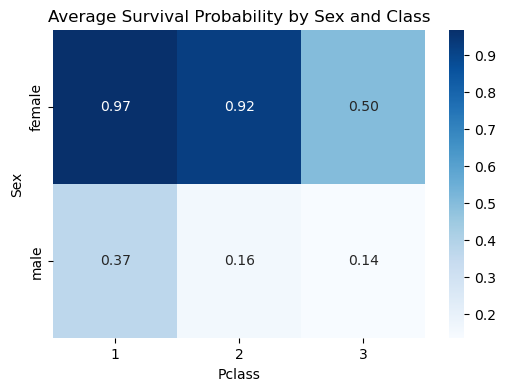

In [69]:

overall_survival_prob = train_df["Survived"].mean()
print(f"Overall average survival probability: {overall_survival_prob:.2f}")


survival_by_sex = train_df.groupby("Sex")["Survived"].mean()
print("\nAverage survival probability by Sex:")
print(survival_by_sex)


survival_by_class = train_df.groupby("Pclass")["Survived"].mean()
print("\nAverage survival probability by Class:")
print(survival_by_class)


survival_by_sex_class = train_df.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()
print("\nAverage survival probability by Sex and Class:")
print(survival_by_sex_class)


plt.figure(figsize=(6,4))
sns.heatmap(survival_by_sex_class, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Survival Probability by Sex and Class")
plt.ylabel("Sex")
plt.xlabel("Pclass")
plt.show()


In [70]:
le = LabelEncoder()

In [71]:
for col in ["Sex", "Embarked"]:
    train_df[col] = le.fit_transform(train_df[col].astype(str))
    test_df[col] = le.transform(test_df[col].astype(str))

In [72]:
train_df["Sex"] = le.fit_transform(train_df["Sex"])
test_df["Sex"] = le.transform(test_df["Sex"])

In [73]:
X_train = train_df[["Sex", "Age", "Pclass"]]  # example features
y_train = train_df["Survived"]
X_test = test_df[["Sex", "Age", "Pclass"]]

In [74]:
train_df["Embarked"] = le.fit_transform(train_df["Embarked"])
test_df["Embarked"] = le.transform(test_df["Embarked"])

In [75]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [76]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]
X_train = train_df[features]
y_train = train_df["Survived"]

In [87]:
X_test["Age"] = X_test["Age"].fillna(X_test["Age"].median())
X_test["Fare"] = X_test["Fare"].fillna(X_test["Fare"].median())
X_test["Embarked"] = X_test["Embarked"].fillna(0) 

In [77]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

In [78]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [79]:
print("Training Accuracy:", accuracy_score(y_train, model.predict(X_train)))

Training Accuracy: 0.9817415730337079


In [80]:
y_pred = model.predict_proba(X_test)[:, 1]
print(y_pred[:5])

[0.22 0.11 0.06 0.04 0.83]


Overall average survival probability: 0.38

Average survival probability by Sex:
Sex
0    0.742038
1    0.188908
Name: Survived, dtype: float64

Average survival probability by Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Average survival probability by Sex and Class:
Pclass         1         2         3
Sex                                 
0       0.968085  0.921053  0.500000
1       0.368852  0.157407  0.135447


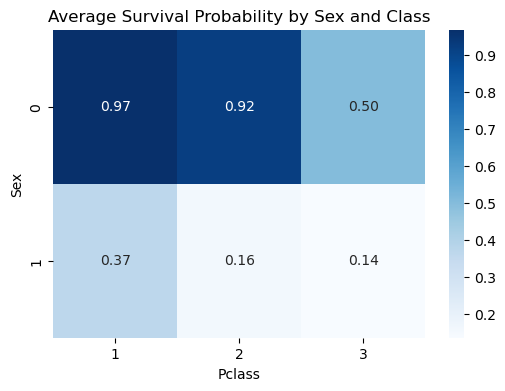

In [81]:
overall_survival_prob = train_df["Survived"].mean()
print(f"Overall average survival probability: {overall_survival_prob:.2f}")


survival_by_sex = train_df.groupby("Sex")["Survived"].mean()
print("\nAverage survival probability by Sex:")
print(survival_by_sex)


survival_by_class = train_df.groupby("Pclass")["Survived"].mean()
print("\nAverage survival probability by Class:")
print(survival_by_class)


survival_by_sex_class = train_df.groupby(["Sex", "Pclass"])["Survived"].mean().unstack()
print("\nAverage survival probability by Sex and Class:")
print(survival_by_sex_class)


plt.figure(figsize=(6,4))
sns.heatmap(survival_by_sex_class, annot=True, fmt=".2f", cmap="Blues")
plt.title("Average Survival Probability by Sex and Class")
plt.ylabel("Sex")
plt.xlabel("Pclass")
plt.show()


In [89]:
print(len(test_df))
print(len(X_test))


418
179


In [98]:
predictions = model.predict(test_df[features])
output = pd.DataFrame({"PassengerId": test_df["PassengerId"], "Survived": predictions})
output.to_csv("submission.csv", index=False)


1st class females were nearly universally saved, showing how high class and female gender combined for maximal survival advantage.
Females had significantly higher survival rates than males across all classes.
Survival probability decreased with lower classes for both sexe.
3rd class males had the lowest survival rate.

Conclusion: The Titanic's evacuation strongly prioritized women and higher-class passengers, with 1st class women being rescued almost universally while 3rd class men had barely a 1 in 7 chance of survival. This reflects both the "women and children first" protocol and the class-based access to lifeboats.